Assignment on Model Selection


Loading Important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\Administrator\Downloads\titanic_dataset .csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


understanding the datasets

In [4]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.shape


(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing Values 

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Visualizations
1. survived coulumn 

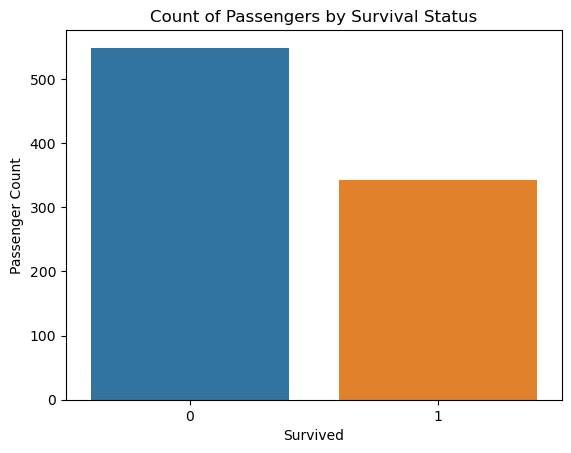

In [10]:
sns.countplot(x='Survived', data=df)
plt.title('Count of Passengers by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Passenger Count')
plt.show()

2. PClass v/s Survived 

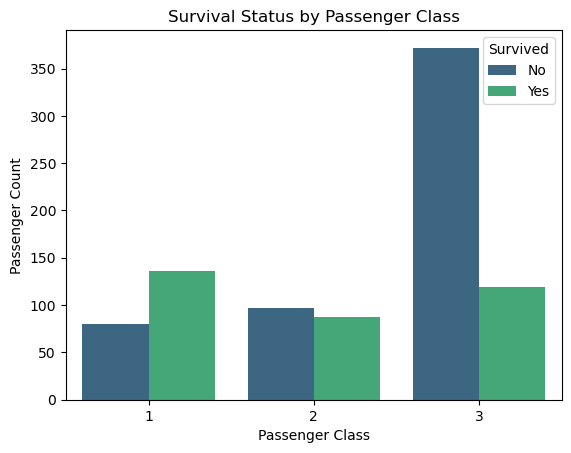

In [11]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='viridis')
plt.title('Survival Status by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


1st class has high chance of surviving than the other two classes

3. Sex Column survival probability

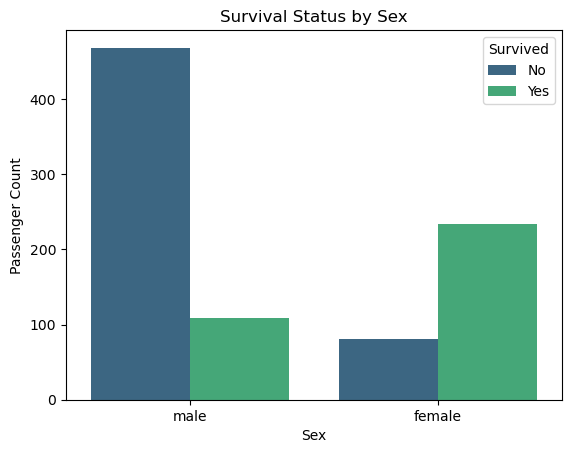

In [12]:
sns.countplot(x='Sex', hue='Survived', data=df, palette='viridis')
plt.title('Survival Status by Sex')
plt.xlabel('Sex')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

The survival probaility for Female is more. They might have given more priority to female than male.

Embarked Survival Probability 

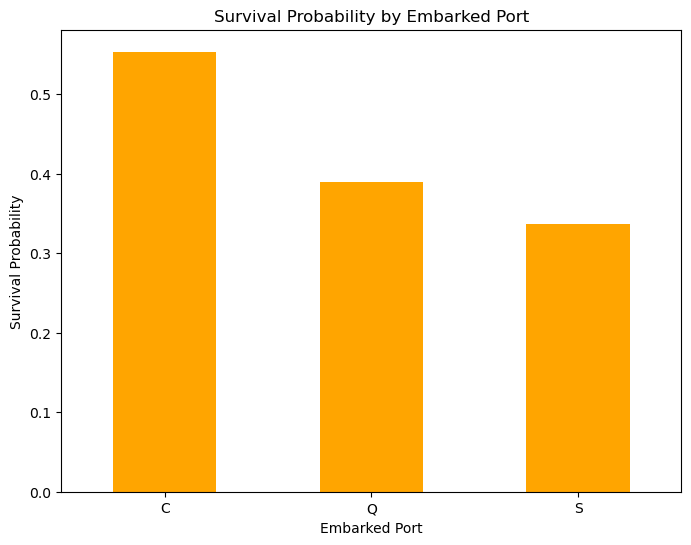

In [13]:
# Group by 'Embarked' and calculate the mean of 'Survived'
survival_prob_by_embarked = df[['Embarked', 'Survived']].groupby('Embarked').mean()

# Plot the mean survival rate for each embarked port
plt.figure(figsize=(8, 6))
survival_prob_by_embarked['Survived'].plot(kind='bar', color='orange')
plt.title('Survival Probability by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Probability')
plt.xticks(rotation=0)
plt.show()


Embarked v/s Pclass

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


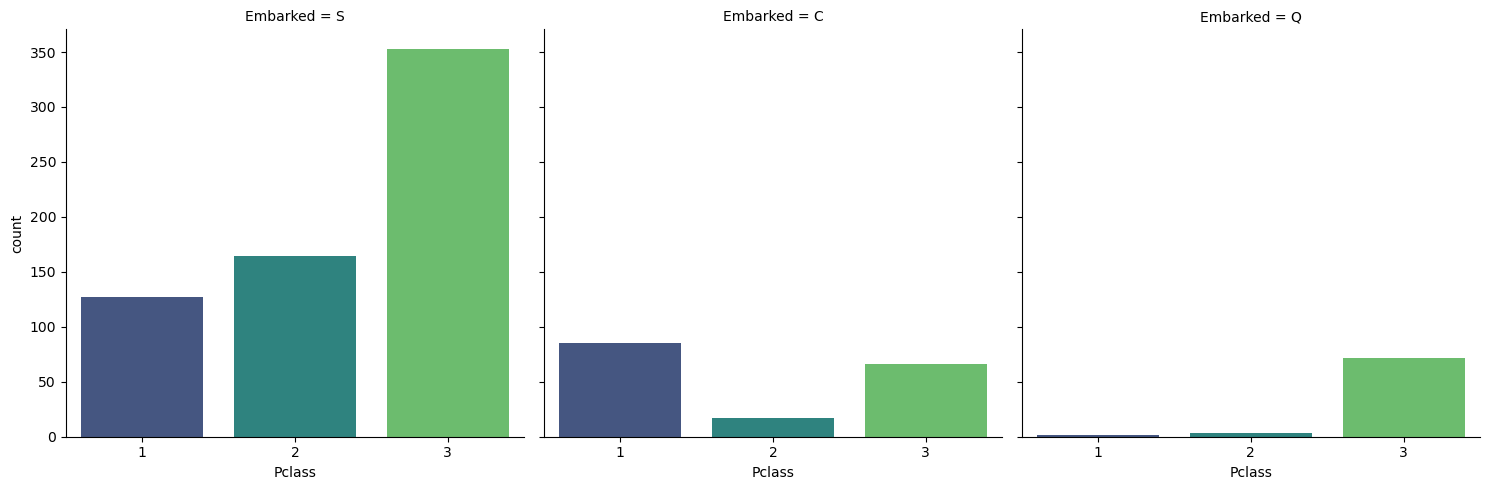

In [14]:
sns.catplot(x='Pclass', col='Embarked', data=df, kind='count', palette='viridis')
plt.show()

Pclass v/s Sex

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


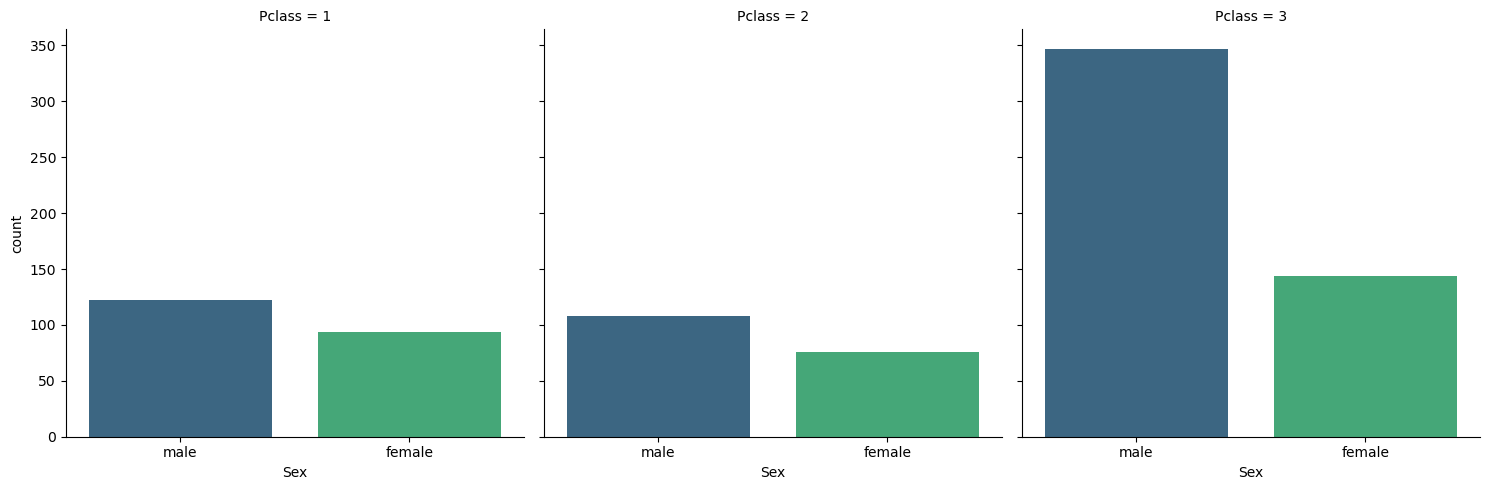

In [15]:
sns.catplot(x='Sex', col='Pclass', data=df, kind='count', palette='viridis')
plt.show()

Create a new feature 'Family size'

In [16]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Drop Unneccessary columns 


In [18]:
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [19]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


Categorical features encoding

In [20]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize'], dtype='object')

In [21]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [22]:
df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,22.0,7.2500,2.0,2
1,1,1,1,38.0,71.2833,0.0,2
2,1,3,1,26.0,7.9250,2.0,1
3,1,1,1,35.0,53.1000,2.0,2
4,0,3,0,35.0,8.0500,2.0,1
5,0,3,0,NaN,8.4583,1.0,1
6,0,1,0,54.0,51.8625,2.0,1
7,0,3,0,2.0,21.0750,2.0,5
8,1,3,1,27.0,11.1333,2.0,3
9,1,2,1,14.0,30.0708,0.0,2


Handling Missing values 
1. Age 

In [23]:
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Embarked        2
FamilySize      0
dtype: int64

In [24]:
df['Age']=df['Age'].fillna(df['Age'].mean())

2.Embarked 

In [25]:
df['Embarked'] = df['Embarked'].fillna(2)# imputing with major value 
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,22.0,7.2500,2.0,2
1,1,1,1,38.0,71.2833,0.0,2
2,1,3,1,26.0,7.9250,2.0,1
3,1,1,1,35.0,53.1000,2.0,2
4,0,3,0,35.0,8.0500,2.0,1


In [26]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

Correlation Matrix and Heatmap

In [27]:
correlation_matrix = df.corr()
correlation_matrix

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
Survived,1.000000,-0.338481,0.543351,-0.069809,0.257307,-0.167675,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.331339,-0.549500,0.162098,0.065997
Sex,0.543351,-0.131900,1.000000,-0.084153,0.182333,-0.108262,0.200988
Age,-0.069809,-0.331339,-0.084153,1.000000,0.091566,-0.026749,-0.248512
Fare,0.257307,-0.549500,0.182333,0.091566,1.000000,-0.224719,0.217138
Embarked,-0.167675,0.162098,-0.108262,-0.026749,-0.224719,1.000000,0.066516
FamilySize,0.016639,0.065997,0.200988,-0.248512,0.217138,0.066516,1.000000


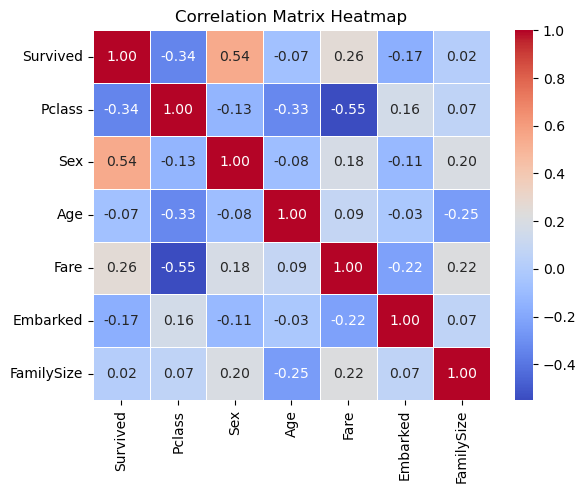

In [28]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Survived and Sex are highly correlated 

SVM Model 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Separating target and feature variables 


In [30]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Train the SVM model
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)

SVC()

In [34]:
SVC_predictions = svc_classifier.predict(X_test)

In [35]:
# Evaluate the model
SVC_accuracy = accuracy_score(y_test, SVC_predictions)
print('\nAccuracySVC:',SVC_accuracy)
SVCconf_matrix = confusion_matrix(y_test, SVC_predictions)
print('\nSVCconf_matrix:',SVCconf_matrix)
classification_rep = classification_report(y_test, SVC_predictions)
print('\nClassification Report:',classification_rep)


AccuracySVC: 0.8100558659217877

SVCconf_matrix: [[93 12]
 [22 52]]

Classification Report:               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



KNN Model 

In [36]:
from sklearn.neighbors import KNeighborsClassifier


In [37]:
# Standardize features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Train the KNN classifier
knn_classifier= KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
knn_predictions=knn_classifier.predict(X_test)                         

In [41]:
#Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, knn_predictions)
conf_matrix_knn = confusion_matrix(y_test, knn_predictions)
classification_rep_knn = classification_report(y_test, knn_predictions)


print('\nKNN Accuracy:',accuracy_knn)
print('\nKNN Confusion Matrix:')
print(conf_matrix_knn)
print('\nKNN Classification Report:')
print(classification_rep_knn)



KNN Accuracy: 0.7877094972067039

KNN Confusion Matrix:
[[88 17]
 [21 53]]

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



k-Fold cross validation 

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [66]:
kfold_validator = KFold(10, shuffle=True, random_state=42)
knn_model = KNeighborsClassifier() # Create a KNN model

In [67]:
# Perform k-fold cross-validation
kcv_result = cross_val_score(knn_model, X, y, cv=kfold_validator)


In [68]:
kcv_result

array([0.74444444, 0.69662921, 0.66292135, 0.69662921, 0.64044944,
       0.6741573 , 0.69662921, 0.71910112, 0.74157303, 0.76404494])

In [69]:
kcv_result.mean()

0.7036579275905118

Stratified k fold cross validation 

In [70]:
from sklearn.model_selection import StratifiedKFold

In [71]:
skfold_validator = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [72]:
# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

In [74]:
# Perform stratified k-fold cross-validation
stratified_kcv_result = cross_val_score(knn_model, X, y, cv=skfold_validator)


In [75]:
stratified_kcv_result

array([0.71111111, 0.73033708, 0.70786517, 0.74157303, 0.6741573 ,
       0.71910112, 0.70786517, 0.69662921, 0.69662921, 0.6741573 ])

In [76]:
stratified_kcv_result.mean()

0.7059425717852684

SVC accuracy :0.8100558659217877
KNN Accuracy: 0.7877094972067039


kcv_result:0.7036579275905118
stratified_kcv_result: 0.7059425717852684

The Best accuracy model is SVC for the titanic dataset 
